# Crude MC Estimator

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

%matplotlib inline

#### Monte Carlo Integration



In [19]:
mu_1 = 4.5
sigma_square_1 = 5.
sigma_1 = np.sqrt(sigma_square_1)

mu_2 = 10.5
sigma_square_2 = 4.
sigma_2 = np.sqrt(sigma_square_2)
prob_1 = 0.4
size=40

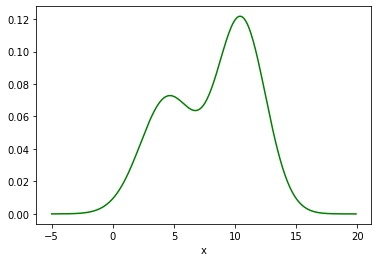

In [20]:
rv_1 = norm(loc = mu_1, scale = sigma_1)
rv_2 = norm(loc = mu_2, scale = sigma_2)
x_ = np.arange(-5, 20, .1)

p = lambda x: prob_1 * rv_1.pdf(x) + (1-prob_1) * rv_2.pdf(x)
plt.plot(x_, p(x_) , "g-")

plt.xlabel("x");

#### Exercise

Write a function which samples from the distribution $p$.

In [25]:
def sample_from_p(size=size):
    raise NotImplementedError()

In [27]:
sample = sample_from_p(50)

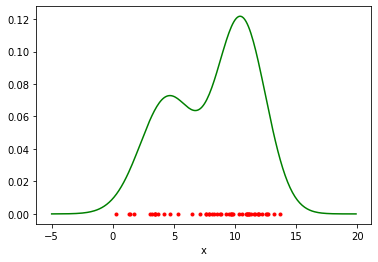

In [28]:
plt.plot(x_, p(x_) , "g-")
plt.plot(sample, np.zeros_like(sample) , "r.")
plt.xlabel("x");

#### Exercise

What is the (true) expectation $\mathbb E_{p(x)} [x]$?

#### Exercise

Implement a crude MC estimator to compute $\mathbb E_{p(x)} [x]$.

In [32]:
expectation(sample)

8.367450619349668

#### Variance of the estimation

Now we take different sample sets an show in a histogram which estimations we get.

In [46]:
def get_multiple_estimations(nb_sample_sets= 10000, sample_size=5):
    estimated_expectations = []
    for i in range(nb_sample_sets):
        sample = sample_from_p(sample_size)
        e = expectation(sample)
        estimated_expectations.append(e)
    return np.array(estimated_expectations)
    
estimated_expectations_5 = get_multiple_estimations()

In [47]:
estimated_expectations.mean()

8.103555805817463

In [51]:
estimated_expectations_10 = get_multiple_estimations(sample_size=10)
estimated_expectations_100 = get_multiple_estimations(sample_size=100)

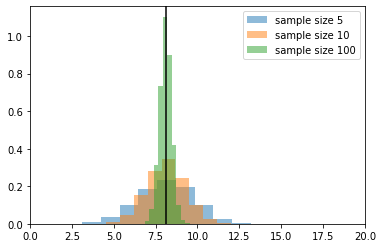

In [57]:
plt.hist(estimated_expectations_5, density=True, alpha=0.5, label="sample size 5")
plt.hist(estimated_expectations_10, density=True, alpha=0.5, label="sample size 10")
plt.hist(estimated_expectations_100, density=True, alpha=0.5, label="sample size 100")
plt.axvline(true_expectation, color="k")
plt.legend()
plt.xlim(0, 20);

In [61]:
# estimated variance of the estimators
print (estimated_expectations_5.var(ddof=1))
print (estimated_expectations_10.var(ddof=1))
print (estimated_expectations_100.var(ddof=1))

2.6054021109717374
1.282693283187293
0.12742666113328097


### Example of an Biased Estimator 

In [62]:
# for the log of the expectation we have an biased estimator!
# Explain why?
np.log(estimated_expectations).mean()

2.070563619194937

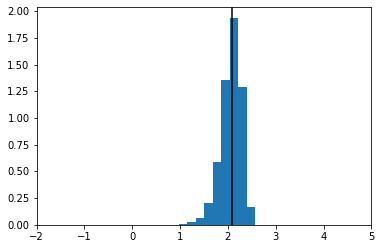

In [65]:
plt.hist(np.log(estimated_expectations), density=True)
plt.axvline(np.log(true_expectation), color="k")
plt.xlim(-2, 5);

In [17]:
np.log(true_expectation)

2.0918640616783932